In [1]:
import tensorflow as tf
import numpy as np

# Définition des données XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Construction du modèle séquentiel
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),
              loss='mean_squared_error',
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(X, y, epochs=10000, verbose=0)

# Test du modèle
print("\nRésultats des prédictions sur les entrées XOR :")
y_pred = model.predict(X)
for i in range(len(X)):
    print(f"Entrée : {X[i]} || Prédiction : {y_pred[i][0]:.4f} || Attendu : {y[i][0]}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Résultats des prédictions sur les entrées XOR :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Entrée : [0. 0.] || Prédiction : 0.0107 || Attendu : 0.0
Entrée : [0. 1.] || Prédiction : 0.9971 || Attendu : 1.0
Entrée : [1. 0.] || Prédiction : 0.9973 || Attendu : 1.0
Entrée : [1. 1.] || Prédiction : 0.0107 || Attendu : 0.0


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


17/17 - 2s - 103ms/step - accuracy: 0.6257 - loss: 0.6694 - val_accuracy: 0.6623 - val_loss: 0.6495
Epoch 2/100
17/17 - 0s - 9ms/step - accuracy: 0.6890 - loss: 0.6465 - val_accuracy: 0.7013 - val_loss: 0.6286
Epoch 3/100
17/17 - 0s - 6ms/step - accuracy: 0.7151 - loss: 0.6282 - val_accuracy: 0.7143 - val_loss: 0.6083
Epoch 4/100
17/17 - 0s - 8ms/step - accuracy: 0.7225 - loss: 0.6112 - val_accuracy: 0.7273 - val_loss: 0.5894
Epoch 5/100
17/17 - 0s - 6ms/step - accuracy: 0.7337 - loss: 0.5959 - val_accuracy: 0.7273 - val_loss: 0.5723
Epoch 6/100
17/17 - 0s - 8ms/step - accuracy: 0.7430 - loss: 0.5811 - val_accuracy: 0.7143 - val_loss: 0.5536
Epoch 7/100
17/17 - 0s - 9ms/step - accuracy: 0.7579 - loss: 0.5673 - val_accuracy: 0.7273 - val_loss: 0.5352
Epoch 8/100
17/17 - 0s - 8ms/step - accuracy: 0.7579 - loss: 0.5540 - val_accuracy: 0.7532 - val_loss: 0.5197
Epoch 9/100
17/17 - 0s - 7ms/step - accuracy: 0.7598 - loss: 0.5425 - val_accuracy: 0.7922 - val_loss: 0.5052
Epoch 10/100
17/17 -

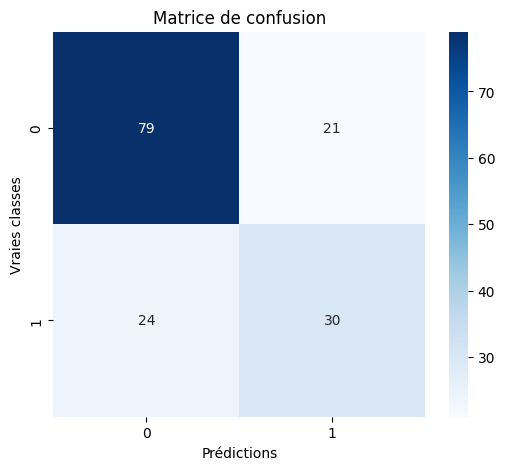

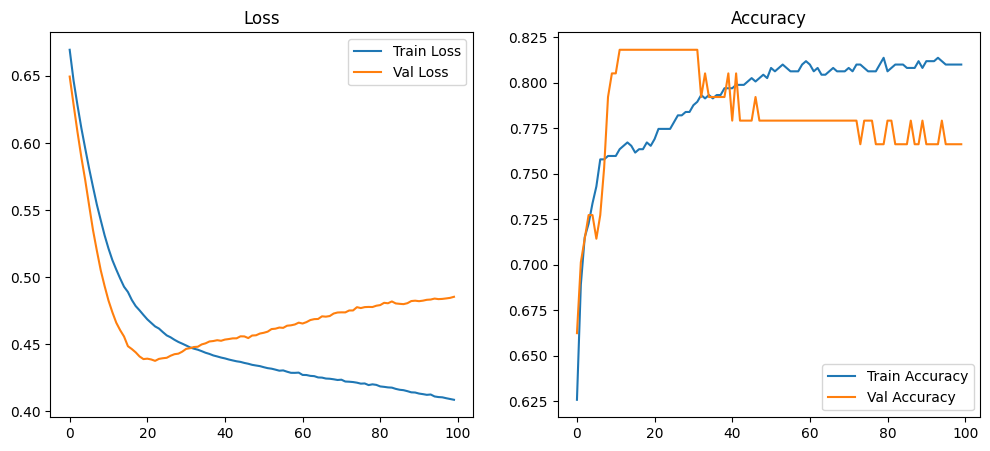

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('diabetes.csv')
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    median = data.loc[data[col] != 0, col].median()
    data.loc[data[col] == 0, col] = median

X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Standardisation
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Division train, validation, test (80-10-10)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=42)

#modèle Keras
layer_sizes = [X_train.shape[1], 8, 8, 1]

model = models.Sequential([
    layers.InputLayer(input_shape=(layer_sizes[0],)),
    layers.Dense(layer_sizes[1], activation='relu',
                 kernel_regularizer=regularizers.l2(0.0002)),
    layers.Dense(layer_sizes[2], activation='relu',
                 kernel_regularizer=regularizers.l2(0.0002)),
    layers.Dense(layer_sizes[3], activation='sigmoid')
])

#Compilation du modèle
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entraînement
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=2
)

#Évaluation test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

#Prédictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred))

#Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.show()

#Courbes de perte et  accuracy
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Val Loss')
axs[0].set_title('Loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='Train Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Val Accuracy')
axs[1].set_title('Accuracy')
axs[1].legend()

plt.show()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, utils, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Pour le chargement et prétraitement des images
def load_data(data_dir, target_size=(32,32)):
    image_paths = []
    labels = []

    base_dir = os.path.join(data_dir, 'tifinagh-images')
    for label in os.listdir(base_dir):
        path = os.path.join(base_dir, label)
        if os.path.isdir(path):
            for fname in os.listdir(path):
                if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                    image_paths.append(os.path.join(path, fname))
                    labels.append(label)

    assert image_paths, "Aucune image trouvée!"

    import cv2
    X = []
    for ip in image_paths:
        img = cv2.imread(ip, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=-1)
        X.append(img)
    X = np.array(X)

    le = LabelEncoder()
    y = le.fit_transform(labels)
    num_classes = len(le.classes_)
    y = utils.to_categorical(y, num_classes)

    return train_test_split(X, y, test_size=0.2, stratify=y, random_state=42), num_classes, le

# Architecture LeNet-5 (Keras)
# def create_lenet(input_shape, num_classes):
#     model = models.Sequential([
#         layers.Conv2D(6, kernel_size=5, activation='relu', padding='same', input_shape=input_shape),
#         layers.AveragePooling2D(),
#         layers.Conv2D(16, kernel_size=5, activation='relu'),
#         layers.AveragePooling2D(),
#         layers.Flatten(),
#         layers.Dense(120, activation='relu'),
#         layers.Dense(84, activation='relu'),
#         layers.Dense(num_classes, activation='softmax'),
#     ])
#     return model
def create_lenet(input_shape, num_classes):
    model = models.Sequential([
        tf.keras.Input(shape=input_shape),  # Correct way to define input
        layers.Conv2D(6, kernel_size=5, activation='relu', padding='same'),
        layers.AveragePooling2D(pool_size=2),
        layers.Conv2D(16, kernel_size=5, activation='relu'),
        layers.AveragePooling2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='softmax'),
    ])
    return model


if __name__ == "__main__":
    #data_dir = '/content/amhcd-data/amhcd-data-64'
    data_dir = '/content/amhcd-data-64'

    #(X_train, X_test, y_train, y_test), num_classes, label_encoder = load_data(data_dir)
    (X_train, X_test, y_train, y_test), num_classes, label_encoder = load_data(data_dir)

    model = create_lenet(input_shape=X_train.shape[1:], num_classes=num_classes)
    model.compile(optimizer=optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()

    history = model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=64,
                        validation_split=0.2)

    loss, acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {acc:.4f}")

    # Affichage des courbes
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title("Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Matrice de confusion et rapport
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sns

    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))